In [6]:
# simms building notebook
from graphviz import Digraph # pip install graphviz==0.13.1

In [8]:
dot = Digraph(comment='High_Throughput pipeline (high level overview)')
dot.node_attr.update(color='lightblue2', style='filled', margin='0.2,0,2')

dot.node('MA', 'assay')
dot.node('MB', 'batch')
dot.edge('MA', 'MB', label=' meta-data: targets, m/z,rt,ri tolerance, etc.')

dot.node('MC', 'sample')
dot.edge('MB', 'MC', label=' meta-data: column serial, maintenance log')

dot.node('MD', 'raw data (.wiff)')
dot.edge('MC', 'MD', label=' meta-data: column pressure, ...\n ? online mass calibration')

dot.node('ME1', 'GW4 storage')
dot.edge('MD', 'ME1', label=' monitor changes in folder/file\l structure and sync changes to storage')

dot.node('MF1', '*.mzML (centroided)')
dot.edge('ME1', 'MF1', label='apply msconvert: proprietary > open format')
dot.node('MF2', 'sync GW4 storage to SAN')
dot.edge('ME1', 'MF2', label='create an additional (read-only)\r copy of the raw data')
dot.node('MG', 'PCI-IS corrected *.mzML')
dot.edge('MF1', 'MG', label=' Extract PCI-IS,\l Smooth & scale PCI-IS signal,\l Apply PCI-IS correction to mzML (for each PCI-IS)')

dot.attr('node', shape='box')
dot.node('OA', 'online quality monitoring')
dot.edge('MG', 'OA', label='run after each sample')
dot.node('BA', 'batch processing')
dot.edge('MG', 'BA', label=' run after each batch')

dot.attr('node', shape='ellipse')

# online quality monitoring
dot.node('OB', 'Extract QC targets')
dot.edge('OA', 'OB', label=' Find and extract regions of interest \l (ROI) based on a target list (m/z,rt window)')
dot.node('OC', 'Report intensities and signal characteristics')
dot.edge('OB', 'OC', label='max intensity, area, asymmetryFactor, \ltailingFactor, ppm_error, rt deviation, etc')
dot.node('OD', 'Report sample meta-data')
dot.edge('OB', 'OD', label='column pressure, \lPCI-IS behavior')

# batch processing
dot.node('BB', 'Extract targets')
dot.edge('BA', 'BB', label=' Find and report ROIs with signal characteristics')
dot.edge('BB', 'BB', label=' Iteratively review results,\ladjust when needed, and re-run with peak filling')

dot.node('BC', 'mzQuality report')    
dot.edge('BB', 'BC', label=' apply standard mzQuality calculations')

dot.node('BD', 'Database')
dot.edge('BB', 'BD', label='Store (non-target) ROI/features in data warehouse')
dot.edge('BD', 'BA', label='Review non-targets and update target list')

dot.render('visual.gv', view=True)

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'visual.gv'], make sure the Graphviz executables are on your systems' PATH

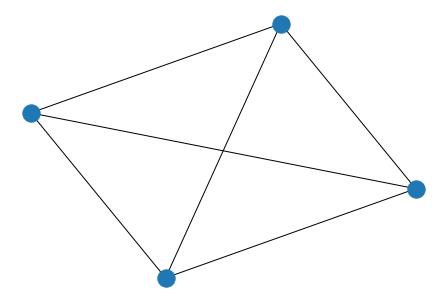